<div>
<img src="https://www.nebrija.com/images/logos/logotipo-universidad-nebrija.jpg" width="200">
</div>

**ALGORITMOS** -
Prof: Carmen Pellicer Lostao

# Algoritmo de Simon

In [1]:
# initialisation
import numpy as np
import math, cmath

# Importing standard Qiskit libraries
from qiskit.providers.aer import Aer, AerSimulator
from qiskit import QuantumCircuit, transpile, assemble, Aer, IBMQ, execute
from qiskit.providers.ibmq import least_busy, IBMQBackend
from qiskit.tools.jupyter import *

# basic plot tools
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import array_to_latex

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()


/tmp/ipykernel_100/3406932148.py:17: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  provider = IBMQ.load_account()


# ORACULOS

En el algoritmo de Simon tenemos una funcion de Oráculo desconocida $f$, que se garantiza que será uno a uno ($1:1$) o dos a uno ($2:1$), donde __uno-a-uno__ y __dos-a-uno__, significa que la funcion tiene las siguientes propiedades:

- **uno-a-uno**: asigna exactamente una salida única para cada entrada. Un ejemplo con una función que toma 4 entradas es:

$$f(1) \rightarrow 1, \quad f(2) \rightarrow 2, \quad f(3) \rightarrow 3, \quad f(4) \rightarrow 4$$

- **dos-a-uno**: asigna exactamente dos entradas a cada salida única. Un ejemplo con una función que toma 4 entradas es:

$$f(1) \rightarrow 1, \quad f(2) \rightarrow 2, \quad f(3) \rightarrow 1, \quad f(4) \rightarrow 2$$

Y donde el mapeo dos-a-uno se realiza según una cadena de bits oculta, $s$, donde:

$$
\textrm{dado }x_1,x_2: \quad f(x_1) = f(x_2) \\
\textrm{está garantizado }: \quad x_1 \oplus x_2 = s
$$

Y resulta que ambos casos se reducen al mismo problema de encontrar $s$, donde una cadena de bits de $s={000...}$ representa el $f$ uno a uno.

Podemos crear una __funcion de oráculo__ para n qubits que codifique una funcion binaria de este tipo.

#### EJERCICIO

Escribe una funcion que tome dos cadenas de bits $x1$ y $x2$ devuelva la cadena $s$ que cumple $x_1 \oplus x_2 = s$


In [2]:
def xor_bitstrings(bitstring1, bitstring2):
    ''' input are two strings of length n bits
        output one string of n bits with bitstring1 XOR bitstring2 operation
    '''
    # Ensure both bit strings are of the same length
    if len(bitstring1) != len(bitstring2):
        raise ValueError("Bit strings must be of the same length")

    # Use a list comprehension to calculate the XOR of corresponding bits
    # ^ bit XOR operation
    result = [str(int(bit1) ^ int(bit2)) for bit1, bit2 in zip(bitstring1, bitstring2)]

    # Join the list of XOR results to form the final bit string
    xor_result = ''.join(result)

    return xor_result

In [3]:
# Example usage:
bitstring1 = "00"
bitstring2 = "01"
result = xor_bitstrings(bitstring1, bitstring2)

print(f"The XOR of {bitstring1} and {bitstring2} is: {result}")

The XOR of 00 and 01 is: 01


## Oráculo para una cadena binaria dada

### EJERCICIO

Dada la siguiente funcion binaria (2:1) de n= 2 bits:

```
x_1 x_0   f(x_1 x_0)$
0   0       0   0
0   1       1   1
1   0       1   1
1   1       0   0
```

Calcula mediante un programa la cadena $s$ que cumple que:

$$
\textrm{dado }x_1,x_2: \quad f(x_1) = f(x_2) \\
\textrm{está garantizado }: \quad x_1 \oplus x_2 = s
$$

In [4]:
# utiliza la funcion xor anterior y computa la cadena b a partir de los valores de x1 y x2 que cumplen f(x1=f(x2)

x1 = "00"
x2 = "11"
result = xor_bitstrings(x1, x2)
print(result)

x1 = "01"
x2 = "10"
result = xor_bitstrings(x1, x2)
print(result)


11
11


Utiliza el Composer para construir un circuito sea un Oráculo de Simon con esta cadena $s$

Ponemos los n qubits del input en superposicion y la ejecutamos para ver que es la funcion que realiza la operacion que hemos definido. Estamos ejecutando todos los valores de input posibles a la vez. 

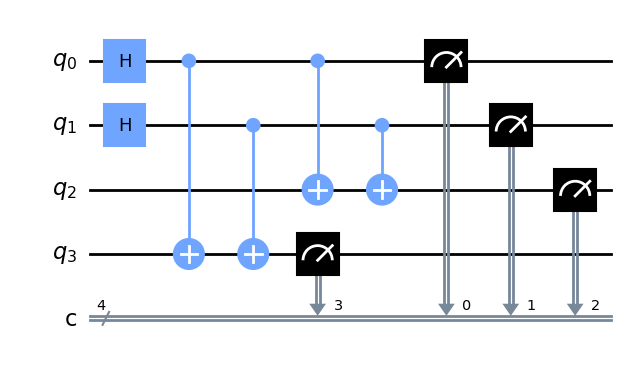

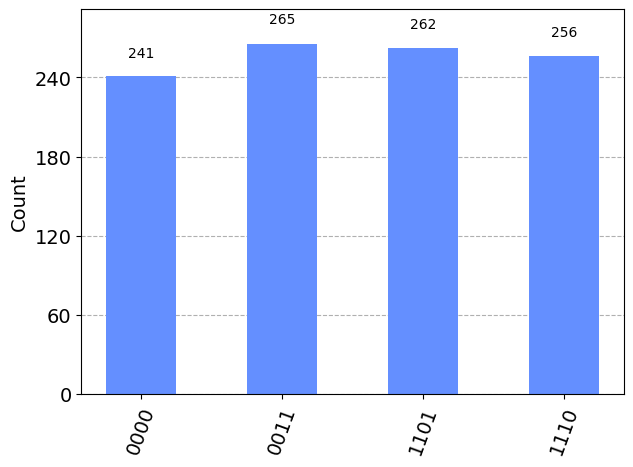

In [5]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[3])
circuit.cx(qreg_q[1], qreg_q[3])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[1], qreg_q[2])

#ponemos las puertas de medida
for i in range(4):
    circuit.measure(i, i)

#lo dibujamos
display(circuit.draw('mpl'))


#Medimos que resultados da este circuito funcion
backend = Aer.get_backend('aer_simulator')
counts=backend.run(circuit).result().get_counts()
display(plot_histogram(counts))

#### EJERCICIO

Dada una cadena de n=2 bits, construye un circuito con n qubits de entrada y n qubits de salida, que compute el resultado de la funcion (2:1) del oráculo de Simon siguiente:

```
x_1 x_0   f(x_1 x_0)$
0   0       0   0
0   1       0   1
1   0       0   0
1   1       0   1
```

Calcula mediante un programa la cadena $s$ que cumple que:

$$
\textrm{dado }x_1,x_2: \quad f(x_1) = f(x_2) \\
\textrm{está garantizado }: \quad x_1 \oplus x_2 = s
$$

In [6]:
# utiliza la funcion xor anterior y computa la cadena b a partir de los valores de x1 y x2 que cumplen f(x1=f(x2)

x1 = "00"
x2 = "10"
result = xor_bitstrings(x1, x2)
print(result)

x1 = "01"
x2 = "11"
result = xor_bitstrings(x1, x2)
print(result)


10
10


Utiliza el Composer para construir un circuito sea un Oráculo de Simon con esta cadena $s$

Ponemos los n qubits del input en superposicion y la ejecutamos para ver que es la funcion que realiza la operacion que hemos definado. Estamos ejecutando todas los valores de input posibles a la vez. 

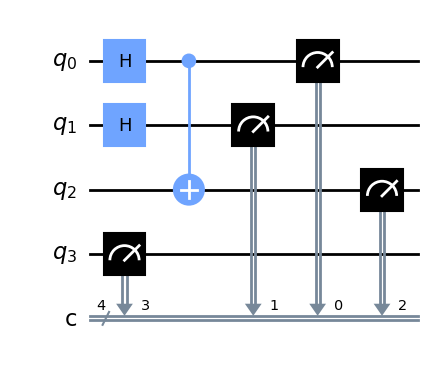

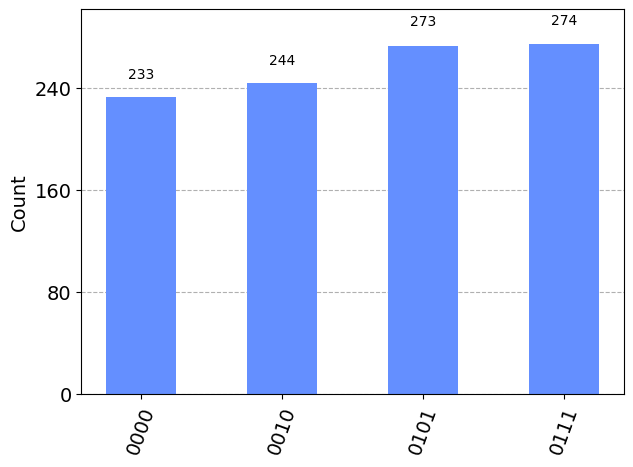

In [7]:
qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[2])

#ponemos las puertas de medida
for i in range(4):
    circuit.measure(i, i)

#lo dibujamos
display(circuit.draw('mpl'))


#Medimos que resultados da este circuito funcion
backend = Aer.get_backend('aer_simulator')
counts=backend.run(circuit).result().get_counts()
display(plot_histogram(counts))

## Creacion de un oraculo aleatorio

Creamos una funcion de oráculo para un numero de bits n que genera una cadena binaria aleatoria y devuelve un circuito que computa una funcion (2:1) que es un Oraculo de Simon caracterizado por esta cadena

In [8]:
### HACEMOS LA FUNCOIN DEL ORACULO

def simon_oracle(n):
    #La funcion crea un objeto de QuantumCircuit y lo devuelve
    #El circuito del oraculo tiene n qubit de entrada y uno de salida -> en total n+1 qubits

    oracle_qc = QuantumCircuit(2*n,n)
    #generation of string s and printing it for further comprobations
    s= ''.join([str(np.random.randint(2)) for b in range(n)])
    print('s',s[::-1]) # la cadena caracteristica es esta, puesto que se codifica en el circuito tiene orden invertido de qubits
    
    #draw a barrier before oracle
    oracle_qc.barrier()

    # copy the content of the first register to the second register
    for i in range(n):
        oracle_qc.cx(i, n+i)

    # get the least index j such that s_j is "1"
    j = -1
    for i, c in enumerate(s):
        if c == "1":
            j = i
            break

    # Creating 1-to-1 or 2-to-1 mapping with the j-th qubit of x as control to XOR the second register with s
    for i, c in enumerate(s):
        if c == "1" and j >= 0:
            oracle_qc.cx(j, n+i) #the i-th qubit is flipped if s_i is 1

    # get random permutation of n qubits
    perm = list(np.random.permutation(n))

    #initial position
    init = list(range(n))
    i = 0
    while i < n:
        if init[i] != perm[i]:
            k = perm.index(init[i])
            oracle_qc.swap(n+i, n+k) #swap qubits
            init[i], init[k] = init[k], init[i] #marked swapped qubits
        else:
            i += 1

    # randomly flip the qubit
    for i in range(n):
        if np.random.random() > 0.5:
            oracle_qc.x(n+i)

    # Apply the barrier to mark the end of the blackbox function
    oracle_qc.barrier()


    oracle_qc.name = 'Simon-Oracle' #to show in the display circuit
    return oracle_qc

#### EJERCICIO

Lo ejecutamos en superposicion para ver la salida de la funcion del oráculo

s 11


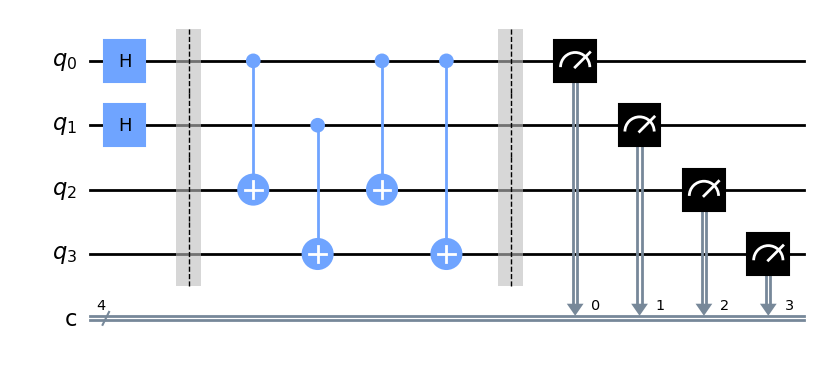

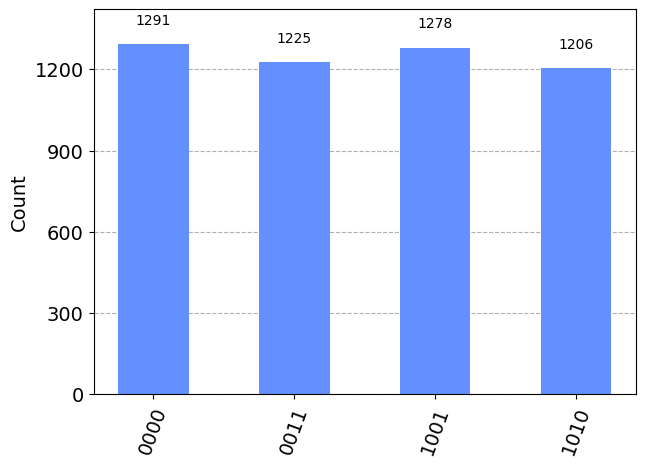

In [9]:
#Creamos un circuito de n qubits+1
n=2
circuit = QuantumCircuit(2*n, 2*n)

#ponemos los qubits de entrada en superposicion
for qubit in range(n):
    circuit.h(qubit)

# Le añadimos el oráculo con funcion aleatoria
new_circuit = circuit.compose(simon_oracle(n),range(2*n))

#ponemos las puertas de medida
for i in range(2*n):
    new_circuit.measure(i, i)
    
    
#Mostramos el circuito
display(new_circuit.draw())

backend = Aer.get_backend('aer_simulator')
#results = execute(new_circuit, backend=backend).result()
#counts = results.get_counts()
counts=backend.run(new_circuit, shots=5000).result().get_counts()

#mostramos histograma resultado
display(plot_histogram(counts))


Comprobamos que las cadenas que cumplen $ x_1 \oplus x_2 = s$ son las que tienen el mismo resultado de la funcion del Oráculo

In [10]:
xor_bitstrings('01', '10')

'11'

# Ejecucion del Algoritmo de Simon

#### EJERCICIO

Construye un circuito que ejecute el algoritmo de Simon para un Oraculo aleatorio.

Ejecutalo y obten los resultados de las medidas para determinar la cadena s del Oraculo en un proceso posterior de postprocesado.

s 01


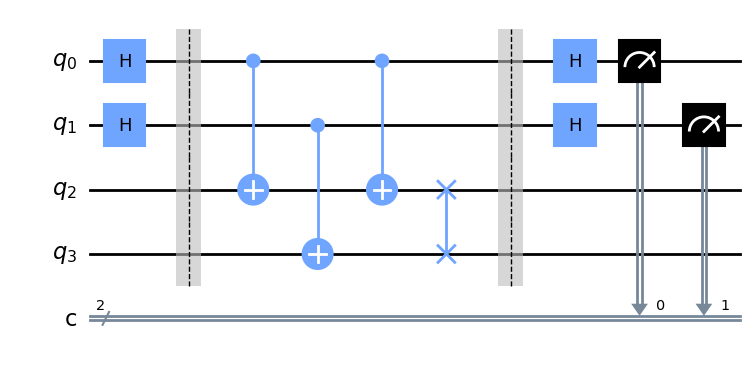

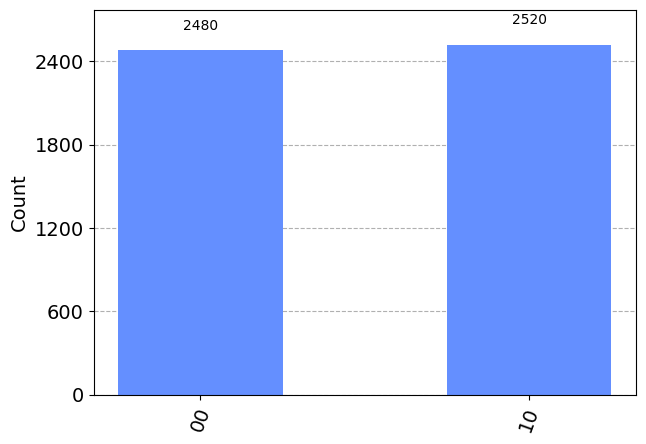

In [11]:
#Creamos un circuito de n qubits+1
n=2
circuit = QuantumCircuit(2*n, n)

#ponemos los qubits de entrada en superposicion
for qubit in range(n):
    circuit.h(qubit)

# Le añadimos el oráculo con funcion aleatoria
new_circuit = circuit.compose(simon_oracle(n),range(2*n))

#le añadimos las puertas de Hadamard finales
for qubit in range(n):
    new_circuit.h(qubit)

#ponemos las puertas de medida
for i in range(n):
    new_circuit.measure(i, i)
    
    
#Mostramos el circuito
display(new_circuit.draw())


#Ejecutamos el circuito
aer_sim = Aer.get_backend('aer_simulator')
results = aer_sim.run(new_circuit, shots=5000).result()
counts = results.get_counts()
plot_histogram(counts)

#mostramos histograma resultado
display(plot_histogram(counts))

#### EJERCICIO

Realizaremos la etapa de postporcesado del algoritmo para descubrir la cadena s del Oráculo y lo haremos inicialmente con una aproximacion de fuerza bruta.

Construye las siguientes funciones binarias:

- __dot_product_modulo_2__: que tome dos bitstrings y calcule el producto escalar binario (modulo 2) de ambas

- __generate_all_bitstrings__: que tome un numero de bits y genere todos los bitstreams posibles para ese numero de bits dado

Y utilizalas para recorrer todas las posibles cadenas s y encontrar aquellas que cumplen $ s.x mod 2 = 0 $ para todas las cadenas $x$ medidas en la salida del circuito del algoritmo de Simon anterior


In [12]:
def dot_product_modulo_2(bitstring1, bitstring2):
    # Ensure both bit strings are of the same length
    if len(bitstring1) != len(bitstring2):
        raise ValueError("Bit strings must be of the same length")

    # Use a list comprehension to calculate the XOR of corresponding bits
    result = [int(bit1) * int(bit2) for bit1, bit2 in zip(bitstring1, bitstring2)]

    # Take the XOR sum and calculate modulo 2
    dot_product_mod_2 = sum(result) % 2

    return dot_product_mod_2

# Example usage:
bitstring1 = "11110"
bitstring2 = "10100"
result = dot_product_modulo_2(bitstring1, bitstring2)

print(f"The dot product modulo 2 of {bitstring1} and {bitstring2} is: {result}")


The dot product modulo 2 of 11110 and 10100 is: 0


In [13]:
bitstring1 = "11"
bitstring2 = "10"
[int(bit1) * int(bit2) for bit1, bit2 in zip(bitstring1, bitstring2)]

[1, 0]

In [14]:
def generate_all_bitstrings(length):
    # Use binary format to generate all possible bitstrings
    bitstrings = [format(i, '0' + str(length) + 'b') for i in range(2**length)]
    return bitstrings

# Set the length of the bitstrings
bitstring_length = 2

# Generate all possible bitstrings of 3 bits
all_bitstrings = generate_all_bitstrings(bitstring_length)

# Print the result
print("All possible bitstrings of length", bitstring_length, ":")
for bitstring in all_bitstrings:
    print(bitstring)


All possible bitstrings of length 2 :
00
01
10
11


In [15]:
#todos los valores obtenidos con el circuito del algoritmo de Simon son
valores_resultado_simon=list(counts.keys())
valores_resultado_simon

['10', '00']

In [18]:
#Tenemos la cadena del Oráculo, que copiamos aqui para cerciorarnos de que encontramos la misma cadena
s='01'
print('s',s)

n=2
#algoritmo de fuerza bruta que encuentra la cadena s
for b in generate_all_bitstrings(n):  #para todas las posibles cadenas
    valid=True
    #print(b[::-1],'----------')
    contador=0
    for c in valores_resultado_simon:  #comprobamos si el producto escalar binario es uno o no
        contador+=1
        if dot_product_modulo_2(c,b) == 1: #si el producto es uno en para algun c no comprobamos más
            break
        elif contador==len(list(counts.keys())): # si todos los productos no han sido uno, esta cadena es la que buscamos
            print(b)

#SOLUCION: Obteneos la solucion trivial 00..0 y la cadena s del Oráculo

s 01
00
01


In [20]:
#Tenemos la cadena del Oráculo, que copiamos aqui para cerciorarnos de que encontramos la misma cadena
s='01'
print('s',s)

n=2
#algoritmo de fuerza bruta que encuentra la cadena s
print('valor resultado simon y - bitstring prueba s - dot_product_mod2')
for b in generate_all_bitstrings(n):  #para todas las posibles cadenas
    print('b=',b,'-------------------')
    for y in valores_resultado_simon:  #comprobamos si el producto escalar binario es uno o no
        print('---------------------------------')
        #if dot_product_modulo_2(y,b) == 1: break
        #else:
        print(y, ' - ', b, ' - ',dot_product_modulo_2(y,b))

#SOLUCION: Obteneos la solucion trivial 00..0 y la cadena s del Oráculo

s 01
valor resultado simon y - bitstring prueba s - dot_product_mod2
b= 00 -------------------
---------------------------------
10  -  00  -  0
---------------------------------
00  -  00  -  0
b= 01 -------------------
---------------------------------
10  -  01  -  0
---------------------------------
00  -  01  -  0
b= 10 -------------------
---------------------------------
10  -  10  -  1
---------------------------------
00  -  10  -  0
b= 11 -------------------
---------------------------------
10  -  11  -  1
---------------------------------
00  -  11  -  0


A continuación se recoge un metodo algebraico para encontrar la cadena s que podemos utilizar tambien en lugar del metodo de fuerza bruta anterior

In [58]:
# Post-processing step
# Constructing the system of linear equations Y s = 0
# By k[::-1], we reverse the order of the bitstring
lAnswer = [ (k[::-1],v) for k,v in counts.items() if k != "0"*n  ] #excluding the trivial all-zero
#Sort the basis by their probabilities
lAnswer.sort(key = lambda x: x[1], reverse=True)

Y = []
for k, v in lAnswer:
    Y.append( [ int(c) for c in k ] )


#import tools from sympy
from sympy import Matrix, pprint, MatrixSymbol, expand, mod_inverse


Y = Matrix(Y)

#pprint(Y)

#Perform Gaussian elimination on Y
Y_transformed = Y.rref(iszerofunc=lambda x: x % 2==0) # linear algebra on GF(2) 

#to convert rational and negatives in rref of linear algebra on GF(2)
def mod(x,modulus):
    numer, denom = x.as_numer_denom()
    return numer*mod_inverse(denom,modulus) % modulus

Y_new = Y_transformed[0].applyfunc(lambda x: mod(x,2)) #must takecare of negatives and fractional values
#pprint(Y_new)

print("The hidden bistring s[ 0 ], s[ 1 ]....s[",n-1,"] is the one satisfying the following system of linear equations:")
rows, cols = Y_new.shape
for r in range(rows):
    Yr = [ "s[ "+str(i)+" ]" for i, v in enumerate(list(Y_new[r,:])) if v == 1 ]
    if len(Yr) > 0:
        tStr = " + ".join(Yr)
        print(tStr, "= 0")

The hidden bistring s[ 0 ], s[ 1 ]....s[ 5 ] is the one satisfying the following system of linear equations:
s[ 0 ] + s[ 1 ] = 0
s[ 2 ] = 0
s[ 3 ] = 0
s[ 4 ] = 0
s[ 5 ] = 0


# Ejecucion en un Simulador con ruido

### EJERCICIO

Ejecuta en un simulador con ruido el circuito con el algoritmo de Simon, para ello:

- Creamos el circuito cuántico, que llamamos <b>simon_circuit </b>
- Preparamos un simulador con el ruido de un dispositivo real, el `ibmq_vigo`.
- Transpilamos el circuito y lo ejecutamos en el simulador
- Realizamos el postprocesado de los resultados obtenidos para encontrar la cadena s

Debido al ruido de los calculos no es sencillo ontener un calculo concluyente de la cadena s

funcion constante output siempre 1


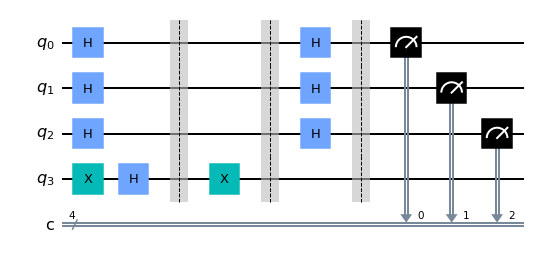

In [ ]:
#Creamos un circuito de n qubits+1
n=3
circuit = QuantumCircuit(n+1, n+1)

#PASO 1 - ponemos los qubits de entrada en superposicion
for qubit in range(n):
    circuit.h(qubit)

#ponemos el qubit de salida
circuit.x(n)
circuit.h(n)
circuit.barrier(range(n+1))

# PASO 2- Le añadimos el oráculo con funcion aleatoria
dj_circuit = circuit.compose(dj_oracle(n),range(n+1))
dj_circuit.barrier(range(n+1))


#PASO 3 - Le añadimos las puertas Hadamard
for i in range(n):
    dj_circuit.h(i)
dj_circuit.barrier(range(n+1))


#PASO 4- ponemos las puertas de medida solo para los qubits de la entrada
for i in range(n):
    dj_circuit.measure(i, i)


#Mostramos el circuito
display(dj_circuit.draw())

Preparamos un simulador con el ruido de un dispositivo real, el `ibmq_vigo`.

In [ ]:
from qiskit.providers.fake_provider import FakeVigo

# Tomamos un backend ruidoso ficticio de fake providers
device_backend = FakeVigo()

#creamos el simulador
sim_vigo = AerSimulator.from_backend(device_backend)

Transpilamos el circuito y lo ejecutamos en el simulador

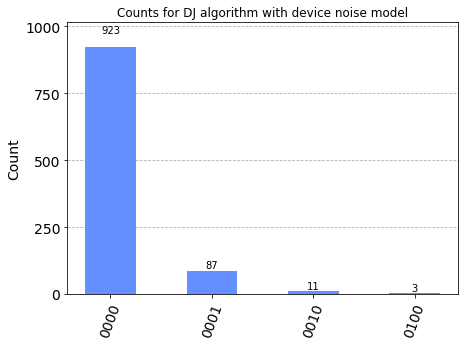

In [ ]:
# Transpilamos el circuito para mapearlo a las puertas ruidosass
tcirc = transpile(dj_circuit, sim_vigo)

# Ejecutamos el circuito y obtenemos el resultado
result_noise = sim_vigo.run(dj_circuit).result()
counts_noise = result_noise.get_counts(0)
plot_histogram(counts_noise,
               title="Counts for DJ algorithm with device noise model")

Y cuando termine la ejecucion, realizamos el postprocesado y obtencion de la cadena $s$ resultado

# Ejecucion en un BackEnd cuántico real

### EJERCICIO

Ejecuta en un backend real cuantico el circuito con el algoritmo de Simno, para ello:

- Creamos el circuito cuántico, que llamamos <b>simon_circuit </b>
- Lo ejecutamos primero en el simulador para ver si funciona bien antes de enviarlo a un BackEnd cuántico real
- Buscamos el backend que este menos cargado de trabajos
- Transpilamos el circuito y lo enviamos para ejecucion
- Realizamos el postprocesado de los resultados obtenidos para encontrar la cadena s

Debido a la imperfeccion de los ordenadores reales y el ruido de los calculos no es sencillo ontener un calculo concluyente de la cadena s

funcion constante output siempre 1


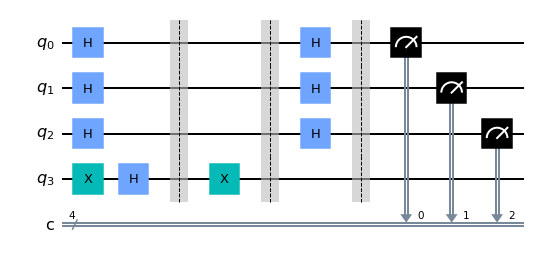

In [ ]:
#Creamos un circuito de n qubits+1
n=3
circuit = QuantumCircuit(n+1, n+1)

#PASO 1 - ponemos los qubits de entrada en superposicion
for qubit in range(n):
    circuit.h(qubit)

#ponemos el qubit de salida
circuit.x(n)
circuit.h(n)
circuit.barrier(range(n+1))

# PASO 2- Le añadimos el oráculo con funcion aleatoria
dj_circuit = circuit.compose(dj_oracle(n),range(n+1))
dj_circuit.barrier(range(n+1))


#PASO 3 - Le añadimos las puertas Hadamard
for i in range(n):
    dj_circuit.h(i)
dj_circuit.barrier(range(n+1))


#PASO 4- ponemos las puertas de medida solo para los qubits de la entrada
for i in range(n):
    dj_circuit.measure(i, i)


#Mostramos el circuito
display(dj_circuit.draw())

### EJERCICIO

Lo ejecutamos en el simulador para ver si funciona bien antes de enviarlo a un BackEnd cuántico real

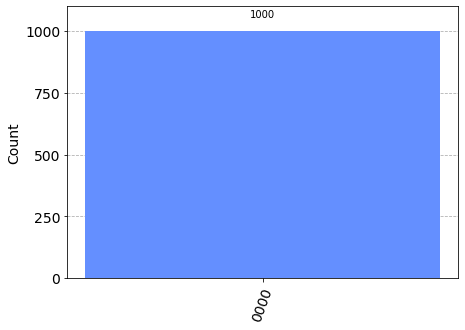

In [ ]:
# use local simulator
backend = Aer.get_backend('aer_simulator')
shots = 1000  # up to 65536
#dj_circuit = dj_algorithm(n)
results = execute(dj_circuit, backend=backend, shots=shots).result()
counts = results.get_counts()

plot_histogram(counts)

Elejimos un backend que tenga pocos jobs en la cola de ejecucion

In [ ]:
# using a real qc backend: lest busy
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) \
                                      and not x.configuration().simulator \
                                      and x.status().operational == True))
print("least busy backend: ", backend)

least busy backend:  ibmq_belem


In [ ]:
# using a real backend by name
backend = provider.get_backend(name='ibmq_XXXX')
print("selected backend: ", backend)

Traceback (most recent call last):
  Input In [14] in <cell line: 2>
    backend = provider.get_backend(name='ibmq_XXXX')
  File /opt/conda/lib/python3.8/site-packages/qiskit/providers/provider.py:55 in get_backend
    raise QiskitBackendNotFoundError("No backend matches the criteria")
QiskitBackendNotFoundError: 'No backend matches the criteria'

Use %tb to get the full traceback.


In [ ]:
shots = 20000
%qiskit_job_watcher
job = execute(dj_circuit, backend=backend, shots=shots, optimization_level=3)  #optimiza automaticamente para el layout map de qubits (coge el layout optimio y simplifica puertas si puede hacerlo)
# layout = [0, 4, 2, 3, 1]   # hanoi
# job = execute(dj_circuit, backend=backend, shots=shots, initial_layout=layout, optimization_level=3)
print('backend: ', backend)
print(job.job_id())

In [1]:
# Para comprobar los resultados de un job id
#provider = IBMQ.get_provider(hub='ibm-q-internal', group='deployed', project='default')
backend = provider.get_backend('ibmq_belem')
old_job = backend.retrieve_job('635a55fb7a93ee4ecee25143')

results = old_job.result()
counts = results.get_counts()
plot_histogram(counts)

Traceback (most recent call last):
  Cell In[1], line 3
    backend = provider.get_backend('ibmq_belem')
NameError: name 'provider' is not defined

Use %tb to get the full traceback.


Y cuando termine la ejecucion, realizamos el postprocesado y obtencion de la cadena $s$ resultado